### [zurück zum Index](../index.md)

### Erste Quanten Schaltkreise (Gates)

## Ihr erster Quantenschaltkreis

In einem Schaltkreis müssen wir normalerweise drei Aufgaben erledigen: 

1. Zunächst muss die Eingabe kodiert werden,
2. dann folgt die eigentliche Berechnung, 
3. und schließlich wird eine Ausgabe extrahiert. 

Der erste  Quantenschaltkreis konzentriert sich auf den letzten Punkt

Begonnen wird  mit der Erstellung eines Quantenschaltkreises mit 3 Qubits und 3 Ausgängen.

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import qiskit
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute, BasicAer, Aer
from qiskit.tools.visualization import plot_histogram, circuit_drawer

from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_bloch_multivector, array_to_latex
from numpy import sqrt, pi

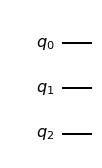

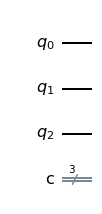

In [3]:
qc = QuantumCircuit(3)
display(qc.draw('mpl'))

qc = QuantumCircuit(3,3)
display(qc.draw('mpl'))

Schließlich erstellt die Methode qc.draw() eine Zeichnung der Schaltung für uns. 

Jupyter Notebooks werten die letzte Zeile einer Codezelle aus und zeigen sie unterhalb der Zelle an. 

Da "qc.draw()" eine Zeichnung zurückgibt, ist es das, was wir unter dem Code sehen. 
In unserem Schaltkreis gibt es noch keine Gatter, also sehen wir nur einige horizontale Linien.

#### Python basics (what’s a method?)

    Die Klasse QuantumCircuit ist ein Satz von Anweisungen zur Darstellung von Quantenschaltungen als Bits, 
    aber wenn wir eine dieser Schaltungen ändern wollen, müssen wir auch wissen, wie wir die Bits 
    entsprechend ändern können. 

    In Python gibt es für Objekte "Methoden", d.h. eine Reihe von Anweisungen, um etwas mit dem Objekt zu tun. 

    In der obigen Zelle betrachtet die Methode .draw() den Schaltkreis, den wir erstellt haben, und 
    erstellt eine für Menschen lesbare Zeichnung dieses Schaltkreises.


Als Nächstes brauchen wir eine Möglichkeit, unseren Quantencomputer anzuweisen, unsere Qubits zu messen und die 
Ergebnisse aufzuzeichnen. 
Zu diesem Zweck fügen wir unserem Quantenschaltkreis eine "Mess"-Operation hinzu. 
Wir können dies mit der Methode .measure() des QuantumCircuit tun.


Als Nächstes brauchen wir eine Möglichkeit, unseren Quantencomputer anzuweisen, unsere Qubits zu messen und die 
Ergebnisse aufzuzeichnen. 
Zu diesem Zweck fügen wir unserem Quantenschaltkreis eine "Mess"-Operation hinzu. 
Wir können dies mit der Methode .measure() des QuantumCircuit tun.

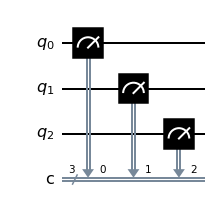

In [6]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3, 3)
# measure qubits 0, 1 & 2 to classical bits 0, 1 & 2 respectively
qc.measure([0,1,2], [0,1,2])
qc.draw()

Als Nächstes wollen wir sehen, welche Ergebnisse ein Betrieb dieser Schaltung bringen würde. 
Dazu verwenden wir einen Quantensimulator, also einen Standardcomputer,
der berechnet, was ein idealer Quantencomputer tun würde.

Die Simulation eines Quantencomputers gilt für klassische Computer als schwierig,da die besten 
Algorithmen, die wir haben, exponentiell mit der Anzahl der Qubits wachsen. 
Daher sind diese Simulationen nur für Schaltkreise mit einer geringen Anzahl von 
Qubits (bis zu ~30 Qubits) oder für bestimmte Arten von Schaltkreisen, für die wir einige Tricks anwenden 
können, um die Simulation zu beschleunigen. 
Dennoch sind Simulatoren sehr nützliche Werkzeuge für den Entwurf kleinerer Quantenschaltungen.


Der Simulator von Qiskit nennt sich " Aer" und wir erstellen zunächst  ein neues Simulator-Objekt.

In [8]:
from qiskit.providers.aer import AerSimulator
sim = AerSimulator()  # make new simulator object

Um die Simulation durchzuführen, können wir die Methode .run() des Simulators verwenden. 
Diese gibt einen "Job" zurück, der Informationen über das Experiment enthält,
z.B. ob das Experiment läuft oder abgeschlossen ist, das Backend, auf dem es ausgeführt wurde, und 
(was für uns wichtig ist) die Ergebnisse des Experiments.

Um die Ergebnisse des Auftrags abzurufen, verwenden wir die Methode "Results".
Die beliebteste Art, die Ergebnisse zu betrachten, ist ein Wörterbuch mit "Zählungen".

In [9]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()    # interpret the results as a "counts" dictionary

{'000': 1024}

Die Schlüssel im Zählwörterbuch sind Bit-Strings, und die Werte sind die Anzahl der Messungen dieses Bit-Strings. 
Bei Quantencomputern können die Ergebnisse zufällig sein, daher ist es üblich, die Schaltung einige Male zu wiederholen. 
Diese Schaltung wurde 1024 Mal wiederholt, was die Standardanzahl für die Wiederholung einer Schaltung in Qiskit ist. 

Konventionell beginnen Qubits immer im Zustand 0, und da wir vor der Messung nichts mit ihnen machen, sind die 
Ergebnisse immer 0.